In [85]:
import matplotlib as plt 
import numpy as np
import cv2
import os
import PIL #image library in python
import tensorflow as tf



from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url= "http://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
dataset_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [4]:
dataset_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir=pathlib.Path(dataset_dir)
data_dir

PosixPath('datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [10]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [14]:
roses=list(data_dir.glob('roses/*'))

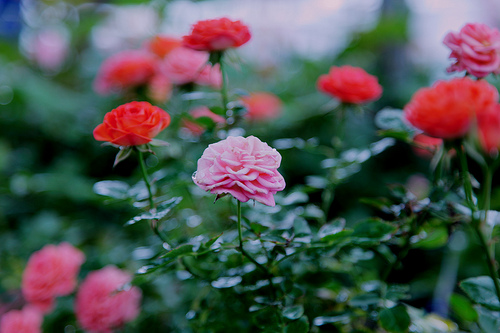

In [16]:
PIL.Image.open(str(roses[1]))

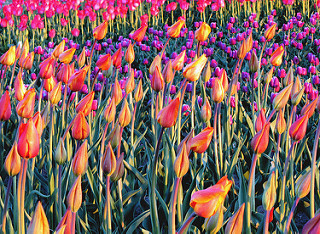

In [18]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [21]:
flowers_images_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [42]:
flowers_labels_dict={
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips':4,
}

In [26]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [30]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [32]:
img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

In [31]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [35]:
x,y=[],[]
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [43]:
x,y=[],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])# to get the flower numbers

In [44]:
y[:5]

[0, 0, 0, 0, 0]

In [45]:
x=np.array(x)
y=np.array(y)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [69]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [70]:
num_classes=5

In [72]:
model= Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
     layers.Dense(128,activation='relu'),
     layers.Dense(num_classes),
    
         
    ])
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=15)

Epoch 1/15
86/86 [==============================] - 25s 287ms/step - loss: 1.5277 - accuracy: 0.3096
Epoch 2/15
86/86 [==============================] - 24s 281ms/step - loss: 1.3426 - accuracy: 0.4146
Epoch 3/15
86/86 [==============================] - 24s 281ms/step - loss: 1.2096 - accuracy: 0.4876
Epoch 4/15
86/86 [==============================] - 24s 281ms/step - loss: 1.1113 - accuracy: 0.5422
Epoch 5/15
86/86 [==============================] - 24s 284ms/step - loss: 1.0724 - accuracy: 0.5618
Epoch 6/15
86/86 [==============================] - 24s 276ms/step - loss: 1.0300 - accuracy: 0.5905
Epoch 7/15
86/86 [==============================] - 24s 282ms/step - loss: 0.9914 - accuracy: 0.6145
Epoch 8/15
86/86 [==============================] - 24s 277ms/step - loss: 0.9633 - accuracy: 0.6279
Epoch 9/15
86/86 [==============================] - 24s 281ms/step - loss: 0.9385 - accuracy: 0.6399
Epoch 10/15
86/86 [==============================] - 24s 277ms/step - loss: 0.9093 - accura

In [73]:
model.evaluate(x_train_scaled, y_train)

86/86 [==============================] - 8s 97ms/step - loss: 0.7106 - accuracy: 0.7318


[0.7106183767318726, 0.7318313717842102]

In [74]:
predictions=model.predict(x_test_scaled)
predictions

29/29 [==============================] - 3s 84ms/step


array([[-0.2643024 ,  1.6906252 ,  0.4764135 , -1.7552459 , -1.4795561 ],
       [ 1.013265  ,  0.04983594,  0.5865102 , -3.2111254 ,  0.45135885],
       [-3.6963315 , -2.9569142 ,  3.1745322 ,  1.2938695 , -1.4640205 ],
       ...,
       [-3.9170496 ,  0.6053711 ,  1.0086153 ,  2.387287  , -2.1706135 ],
       [ 2.224466  , -1.9045484 , -0.74103934, -3.0390937 ,  1.9073536 ],
       [-3.4310105 , -3.0572329 ,  0.9108585 ,  3.34458   , -1.0531545 ]],
      dtype=float32)

In [75]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.09360983, 0.6612044 , 0.19634068, 0.0210772 , 0.02776793],
      dtype=float32)>

In [76]:
np.argmax(score)

1

In [78]:
y_test[0]

1

In [82]:
data_aug=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    
])

In [86]:
plt.axis('0ff')
plt.imshow(x[0])

AttributeError: module 'matplotlib' has no attribute 'axis'